## Feature Engineering

1. Standardisation

The numerical columns (features) will all be standardised to get ready for regression and classification models. So I am making sure that I only have numerical columns only and that any non-numerical columns (id/categoriees/object datatypes) are left the same. 

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# The path to the updated dataset (the merged dataset)
updated_file_path = '../../data/processed/lsoa_census_merged_with_income.csv'

# Loading the updated dataset
merged_data_with_income = pd.read_csv(updated_file_path)

# Displaying a preview to confirm that the data is loaded correctly
print("Loaded Data Preview:")
print(merged_data_with_income.head())


# Identifying the numerical columns
numerical_cols = merged_data_with_income.select_dtypes(include=['float64', 'int64']).columns

# Initialising the scaler
scaler = StandardScaler()

# Standardising the numerical features
merged_data_with_income[numerical_cols] = scaler.fit_transform(merged_data_with_income[numerical_cols])

# Verifying the transformation
print("Standardized Data (First Few Rows):")
print(merged_data_with_income[numerical_cols].head())

# Saving the standardised data for the next steps
standardized_data_path = '../../data/processed/lsoa_census_standardized.csv'
merged_data_with_income.to_csv(standardized_data_path, index=False)


Loaded Data Preview:
   lsoa_code                      names  all_ages_count_2011  \
0  E01000027  Barking and Dagenham 001A               1709.0   
1  E01000028  Barking and Dagenham 001B               1549.0   
2  E01000029  Barking and Dagenham 001C               1602.0   
3  E01000030  Barking and Dagenham 001D               1915.0   
4  E01000031  Barking and Dagenham 002A               1617.0   

   ages_65_plus_count_2011  working_age_count_2011  persons_per_hectare_2011  \
0                    232.0                  1009.0                 11.590370   
1                    220.0                   913.0                107.719054   
2                    445.0                   869.0                 62.358895   
3                    204.0                  1132.0                 66.887880   
4                    231.0                  1033.0                 19.170124   

   couples_with_children_percent_2011  couples_without_children_percent_2011  \
0                           21.06

2. Feature Selection:
    - Correlation Matrix: I am trying to find the relationships between variables (features) and net income after housing costs. This will show me linearity of the relationships with net income. I also will look at for signs of multicollinearity. 

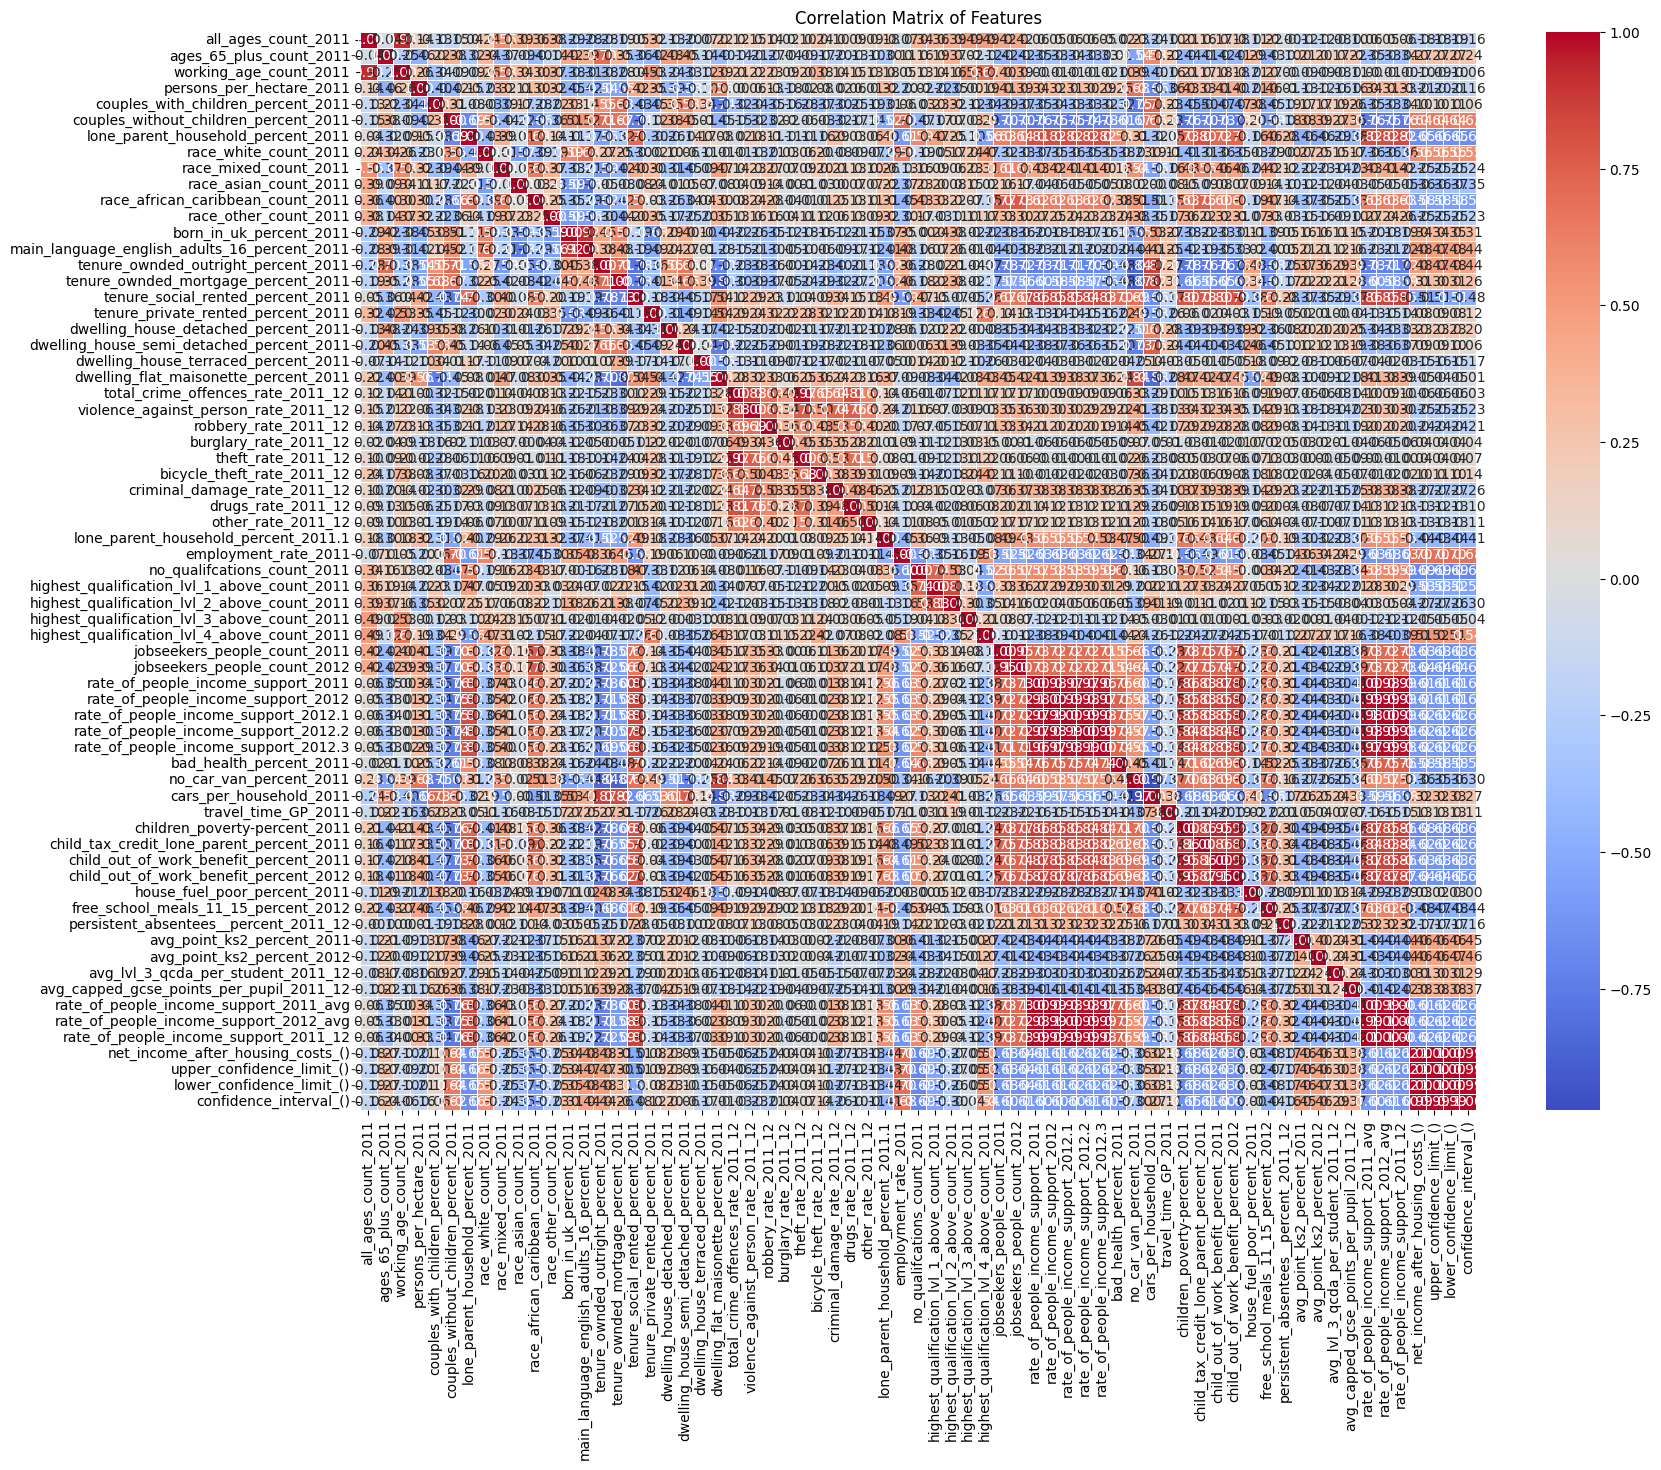

net_income_after_housing_costs_()         1.000000
upper_confidence_limit_()                 0.999435
lower_confidence_limit_()                 0.999247
confidence_interval_()                    0.989209
employment_rate_2011                      0.697535
                                            ...   
jobseekers_people_count_2012             -0.636382
child_out_of_work_benefit_percent_2012   -0.644945
lone_parent_household_percent_2011       -0.653230
children_poverty-percent_2011            -0.678347
no_qualifcations_count_2011              -0.693334
Name: net_income_after_housing_costs_(), Length: 67, dtype: float64


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only the numeric columns
numeric_columns = merged_data_with_income.select_dtypes(include=['number']).columns

# Computing the correlation matrix for the numeric columns
correlation_matrix = merged_data_with_income[numeric_columns].corr()

# Plotting the correlation matrix for all variables (features)
plt.figure(figsize = (18, 14))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f", linewidths = 0.5)
plt.title('Correlation Matrix of Features')
plt.show()

# Focusing on the features that are related to net income
income_related_features = correlation_matrix['net_income_after_housing_costs_()'].sort_values(ascending = False)
print(income_related_features)

# Saving income related correlations to a csv file
income_related_features.to_csv('../../data/raw/income_related_features.csv', header=True)